<a href="https://colab.research.google.com/github/Aniebiet1/ML-projects-/blob/main/Medical_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1: Data Preprocessing

Dataset link = https://www.kaggle.com/datasets/mirichoi0218/insurance

## Importing libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/insurance.csv")

## Data Exploration

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking data with categorical values
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [8]:
# Statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smokers', 'gender'

In [9]:
dataset.groupby('sex')

## Dealing with missing values

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [13]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# One hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype=np.int64)

In [19]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [20]:
dataset.shape

(1338, 9)

## correlation matrix

In [21]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correletion with Charges'}>

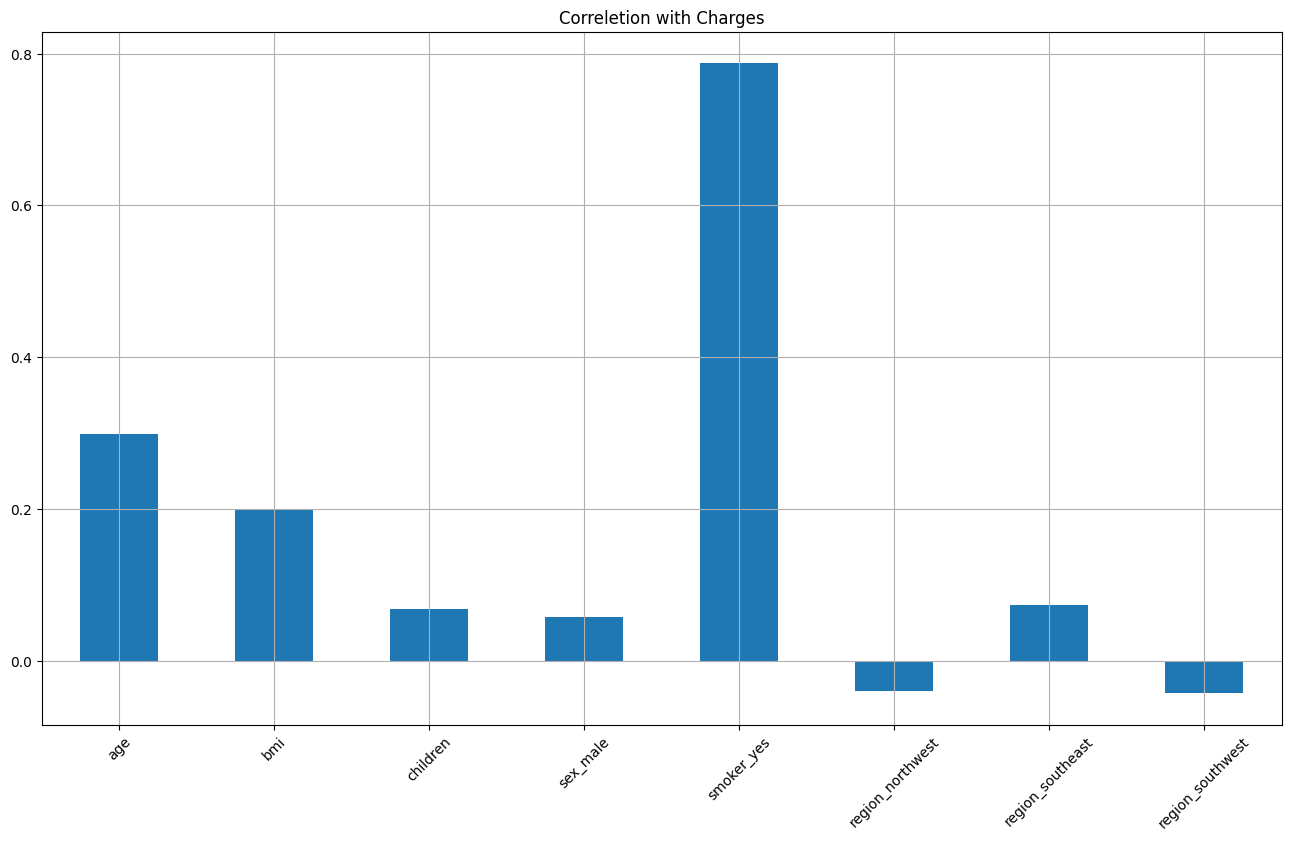

In [22]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correletion with Charges', rot=45, grid=True
)

In [23]:
corr = dataset.corr()

<Axes: >

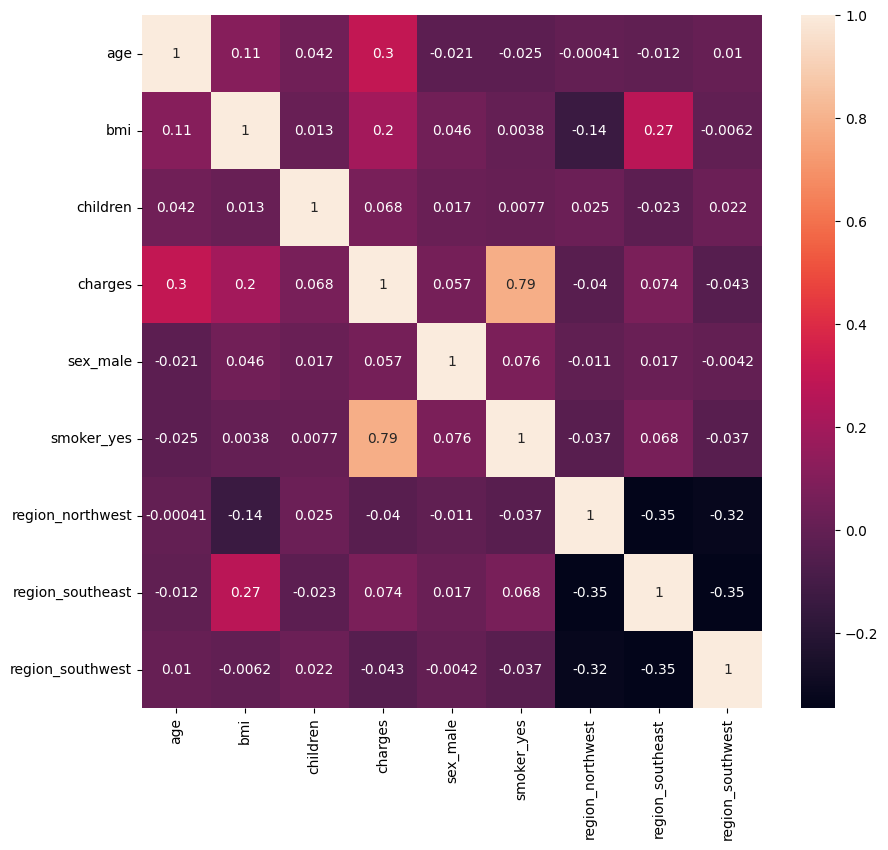

In [24]:
# Heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into test and train set

In [27]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [43]:
# Matrix of features / Independent variable
x = dataset.drop(columns='charges')
x.shape

(1338, 8)

In [44]:
# Dependent Variable
y = dataset['charges']
y.shape

(1338,)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state = 0
)

In [34]:
x_train.shape

(1070, 8)

In [35]:
y_train.shape

(1070,)

In [36]:
x_test.shape

(268, 8)

In [37]:
y_test.shape

(268,)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [42]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part2: Building the model

## 1) Multiple Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = regressor_lr.predict(x_test)

In [48]:
# Analyzing the performance of the model
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, y_pred)

0.7999876970680433

## 2) Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = regressor_rf.predict(x_test)

In [56]:
r2_score(y_test, y_pred)

0.8835164030748084

## 3) XGBoost regression

In [58]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [59]:
y_pred = regressor_xgb.predict(x_test)

In [60]:
r2_score(y_test, y_pred)

0.8994492709535864

# Part 3: Predict charges for a new customer

## example 1

Name:Frank, age:40, sex:1, bmi:45.50, children:4, smooker:1, region:northeast

In [62]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [63]:
Frank_obs = [[40, 45.50, 4, 1, 1, 0, 0, 0 ]]

In [64]:
Frank_obs

[[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [65]:
regressor_xgb.predict(sc.transform(Frank_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43421.676], dtype=float32)

## example 2

Name:Sara, age:19, bmi:27.9, children:0, sex:female, smooker:no, region:northwest

In [73]:
Sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [74]:
regressor_xgb.predict(sc.transform(Sara_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2374.3804], dtype=float32)